# Phân Tích Định Lượng Rủi Rỏ (Quantitative Risk Analysis)

## Đề bài

### 📖 Background
You work as an analyst at an investment fund in New York. Your CFO wants to explore if it is a good idea to invest some of the fund's assets in Bitcoin. You have to prepare a report on this asset and how it compares to the stock market in general.

### 💾 The data

#### Bitcoin daily data in US dollars
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the price at the beginning of the trading day
- "high" - the highest price reached that day
- "low" - the lowest price reached that day
- "close" - the price at the closing of the trading day
- "volume" - how many Bitcoin were traded that day

#### S&P 500 daily data
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the index level at the beginning of the trading day
- "high" - the highest level reached that day
- "low" - the lowest level reached that day
- "close" - the level at the closing of the trading day
- "volume" - how many shares in the companies that make up the index were traded that day

#### inflation and gold as monthly data
- "date" - date from September, 2014 to November, 2021
- "gold_usd" - price in usd of gold for that month
- "cpi_us" - the inflation index for the US for that month (cpi = consumer price index)

_CPI data from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/cpi/). Publicly available information_.

### ❓ Question:
1. How does the performance of Bitcoin compare to the S&P 500 and the price of gold?
2. Analyze Bitcoin's returns and volatility profile. Do you believe it could help improve the performance of a portfolio? Do you believe Bitcoin could be used as a hedge versus inflation?
3. The CFO is looking to lower volatility in the fund. Explore building a portfolio using some or all of these assets. Make a recommendation that minimizes overall risk.

## Giải

### 💬 Head note
This project is module as followed:
- All the data is process in the `prepared_data.py`
- `graphing_functions.py` hosted all the neccesary code to draw the graphs
- `stock-terms.md` responsible for the expert knowledge of the stock markets like indicators, formulas, ...

<h5>The notebook itself only responsible to create a report to draw conclusion on the risk analysis</h4>


In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from prepared_data import *
from graphing_functions import *

### 1. Xem xét tập dữ liệu

- Tập dữ liệu `Bitcoin` & `SP500` ta chỉ quan tâm tới close price, vì đó là giá trị của 1 asset sau phiên giao dịch
- S&P500 cũng đc dùng làm chuẩn khi cần index or market benchmark

Analyzed data based on pandas_profiling
- `bitcoin` has 4 missing data on [2020-04-17, 2020-10-09, 2020-10-12, 2020-10-13]
- `sp500` has 0 missing data

For the sake of analysis, such missing data is dropped 

### 📈 2. Phân tích đường giá

#### 2.1 Phân tích đường giá bằng biểu đồ nến

In [2]:
draw_candle(sp500, 'S&P500 Candle Graph')

In [3]:
draw_candle(bitcoin, 'Bitcoin Candle Graph')

In [4]:
draw_line_plotly(monthly_data, 'date', 'gold_usd', 'Gold-USD price')

c:\Users\LETPC\.virtualenvs\data_science--pQqXRHO\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [5]:
rank_by_btc.close_sp500.mean()
rank_by_btc.gold_usd.mean()

print(f'In average, Bitcoin surpass the price of SP500 by {rank_by_btc.close_sp500.mean():.2f}% and Gold by {rank_by_btc.gold_usd.mean():.2f}%')

In average, Bitcoin surpass the price of SP500 by 295.04% and Gold by 605.84%


In [6]:
import plotly.express as px

fig = px.line(rank_by_btc, x='date', y=['close_sp500', 'gold_usd'])
fig.show()

📊 Analysis 1:
- Bitcoin có mức gia tăng khổng lồ so với các đối thủ - In average, Bitcoin surpass the price of SP500 by 295.04% and Gold by 605.84%, peaked in 2021 at 3400 lần so với vàng và 1400 lần so với SP500

- Ta có thể thấy tính an toàn đến từ S&P500. Giá trị của SP500 mang tính tuần hoàn nhất định. Hầu hết các sóng giảm đều rơi vào khoảng đầu năm với khoảng thời gian từ 1-1.5 tháng, sau đó lại tăng mạnh. Notably nhất là lần rớt đỉnh khoảng đầu 2020 đã bốc hơi gần 1000 USD, tuy nhiên con sóng tăng tiếp theo đã đưa SP500 tăng 1 mạch 3000 USD, chạm mốc 4700 USD.
- Đối với Bitcoin, giá trị của Bitcoin gần như stay still cho tới năm 2018. Tuy nhiên, qua giai đoạn tăng này, Bitcoin tiếp tục rớt giá và giữ nguyên cho tới gần cuối 2020 - Khi mà giá trị của Bitcoin tăng vượt bậc (tính từ đầu năm 2020 giá khoảng 10k USD, dến tháng 4 năm 2021 nó đã gấp 6 lần tài sản lên mức 61k USD)
- Vàng fluctuates vô cùng nhiều so với loại tài sản đảm bảo (secure asset). Tuy nhiên, nếu chỉ tính riêng về biên độ dao động, từ năm 2016 đến 2019, giá vàng khá "bình yên" ở mốc 1200 đến 1600 USD. Sau đó nó tăng 1 mạch hơn 800 USD vào giữa năm 2020, sau đó bị điều chỉnh về mốc dưới 1800 USD tính tới thời điểm ghi nhận

> 💡 **Finding 1**<br>
In average, Bitcoin surpass the price of SP500 by 295.04% and Gold by 605.84%. Có thể thấy rằng khoảng thời điểm từ năm 2019 đến 2021 có rất nhiều sự biến động dẫn tới sự gia tăng đột biên này

### 📈 3. Phân tích volume 

- Khối lượng giao dịch trong phân tích rủi ro được phân tích từ các chỉ số: volume indicator, log volume và OBV

#### 3.1 Phân tích volume vằng plain volume

In [7]:
draw_line_plotly(bitcoin, 'date', 'volume', 'Bitcoin trading volume')
draw_line_plotly(sp500, 'date', 'volume', 'S&P500 trading volume')

c:\Users\LETPC\.virtualenvs\data_science--pQqXRHO\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




#### 3.2 Phân tích volume bằng log volume

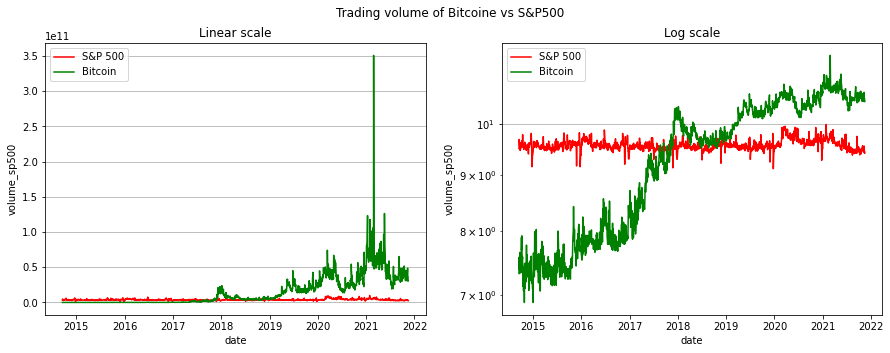

In [8]:
logy = LogYGraph((SeabornFn('lineplot', {'data': sp500_btc, 'x': sp500_btc.date, 'y': 'volume_sp500', 'color': 'red', 'label': 'S&P 500'}),
                SeabornFn('lineplot', {'data': sp500_btc, 'x': sp500_btc.date, 'y': 'volume_btc', 'color': 'green', 'label': 'Bitcoin'}),
                ))

fig, ax1, ax2 = logy.draw()
fig.suptitle('Trading volume of Bitcoine vs S&P500')
ax1.set_title('Linear scale')
ax2.set_title('Log scale')
ax1.grid(axis='y')
ax2.grid(axis='y')

#### 3.3 Phân tích volume bằng OBV

In [9]:
draw_line_plotly(bitcoin_obv, 'date', 'obv', 'Bitcoin OBV')
draw_line_plotly(sp500_obv, 'date', 'obv', 'SP500 OBV')

c:\Users\LETPC\.virtualenvs\data_science--pQqXRHO\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




📊 **Analysis 2**:

- Both Volume, Log volume and OBV shown some significance different in the shape of the graph
- Bitcoin heavily affected by outliner at Feb-26, khi mà khối lượng giao dịch triple từ 100B lên 300B
- Log scale thể hiện rằng mối quan tam đối với Bitcoin vô cùng mạnh bắt đầu ở 2 giai đoạn năm 2016-2018 & 2019-2020, có khoảng rớt giá vào 2018-2019 & 2021-2022, which matches đường chạy giá của Bitcoin.
- Momentum về sự biến động giá theo volume giao dịch thể hiện rõ sự rớt giá này. Trong đầu đến giữa năm 2021, momentum của OBV giảm từ 2.5T -> 1.5T, dẫn tới Bitcoin rớt 20k USD

- Observation về log-volume và price tương tự với S&P500. Ở S&P500, mặc dù ta thấy có 1 giai đoạn từ đầu đến giữa 2020 giá Stock-index giảm đáng kể, sự đi xuống của OBV ko đáng kể, và các mốc OBV tiếp theo toàn đi lên, indicates sự giảm đột ngột ko ảnh hưởng quá nhiều đến giá Stock nếu invested in long term


>💡 **Finding 2**<br> 
Mặc dù sự quan tâm của nhà đầu tư có xu hướng tăng đáng kể qua từng năm, mức độ ổn định về giá so với độ quan tâm của loại tài sản Bitcoin có xu hướng ko ổn định, nhiều sự xuống giá đột ngột -> risky cho short-term investment so với S&P500 có tỉ số price/volume vô cùng ổn định và dễ đoán

### 📈 4. Phân tích định lượng rủi ro

#### 4.1 Standardize return and log-return 

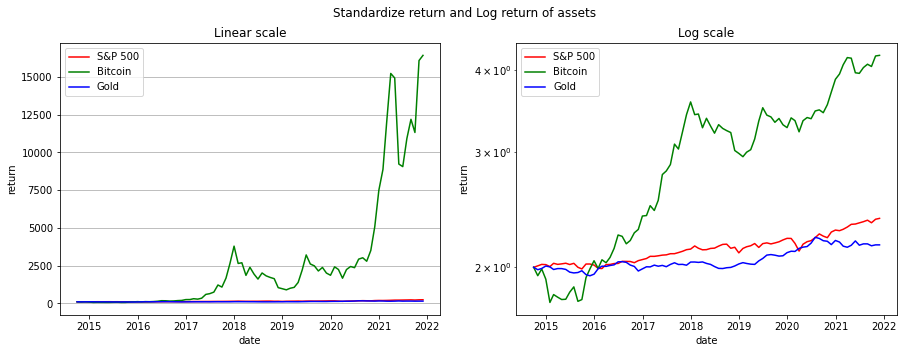

In [10]:
logy = LogYGraph((SeabornFn('lineplot', {'data': std_gains, 'x': 'date', 'y': 'sp_std', 'color': 'red', 'label': 'S&P 500'}),
                SeabornFn('lineplot', {'data': std_gains, 'x': 'date', 'y': 'btc_std', 'color': 'green', 'label': 'Bitcoin'}),
                SeabornFn('lineplot', {'data': std_gains, 'x': 'date', 'y': 'gold_std', 'color': 'blue', 'label': 'Gold'}),
                ))

fig, ax1, ax2 = logy.draw()
fig.suptitle('Standardize return and Log return of assets')
ax1.set_title('Linear scale')
ax2.set_title('Log scale')
ax1.set_ylabel('return')
ax2.set_ylabel('return')
ax1.grid(axis='y')
ax2.grid(axis='y')

In [11]:
covariance_table

,sp_std,btc_std,gold_std
sp_std,1325.050180,1.329040e+05,651.253326
btc_std,132903.983795,1.626724e+07,60412.732951
gold_std,651.253326,6.041273e+04,453.607414


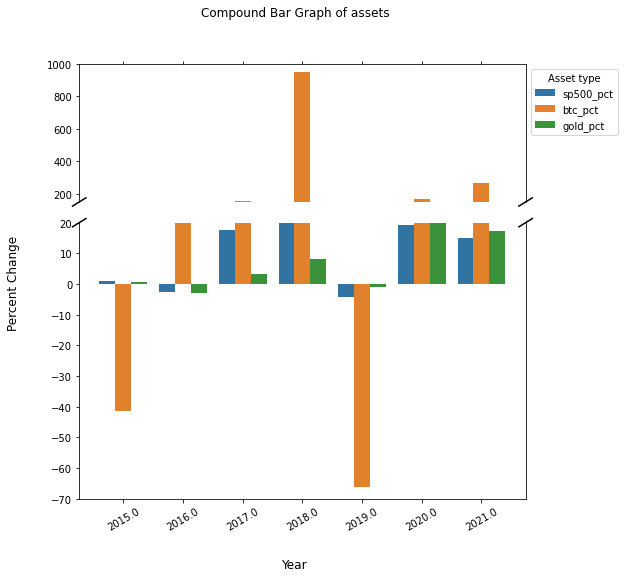

In [12]:
draw_broken_axis(data=std_year, column_as_x_axis='date', column_as_hue='assets', value_label='cummulate return', bot_lim=(-70, 20), top_lim=(150, 1000))

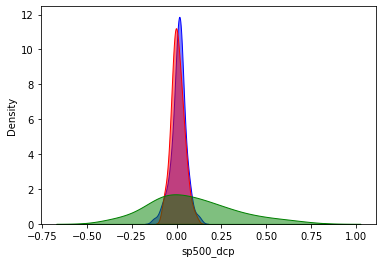

In [13]:
draw_kde_plot_of_dpc(dcp_df)

📊 **Analysis 3**:
- Nếu ko xét đến các yếu tố rủi ro, Bitcoin hoàn toàn outperform cả stock market và tài sản phòng thủ là vàng. 
- Từ đồ thị log-return, ta có thể thấy sự tăng trưởng của Bitcoin similarity to SP&500 rất nhiều (Thể hiện ở chỉ số variance)
- Risk factor có thể dễ dàng thấy ở các năm mà Bitcoin tăng trưởng âm, khi mà nó có thể bốc hơi 60% giá trị của nhà đầu tư trong vòng 1 năm. Đối với nhà đầu tư dài hạn, việc đợi phục hồi là điều có thể, tuy nhiên, đối với nhà đầu tư ngắn hạn, việc đầu tư vào năm 2018 ko phải là ý tốt (Mind that 2018 bitcoin có dấu hiệu tăng rất mạnh, tuy nhiên lập tức hạ nhiệt)
- KDE plot của DCP nghĩa là các dấu chỉ liên quan tới market ko hoàn toàn predicts đc xu hướng của Bitcoin (Bitcoin returns distribution is *'off normal'*)

#### 4.2 Quantifying risk by analyzing the moments of DCP distribution

In [14]:
DCP_Dist_Moments_Report(dcp_df[['sp500_dcp', 'btc_dcp', 'gold_dcp']])(95)

,sp500_dcp,btc_dcp,gold_dcp
volatility ⬇,0.041,0.236,0.036
kurtosis ⬇,1.642,0.069,0.305
VaR (at 95) ⬆,-0.065,-0.282,-0.053
CVaR (at 95) ⬆,-0.087,-0.330,-0.066
MDD ⬆,-0.200,-0.764,-0.161


In [15]:
CompareExtremeCVaR(dcp_df[['sp500_dcp', 'btc_dcp', 'gold_dcp']])()


c:\Users\LETPC\.virtualenvs\data_science--pQqXRHO\lib\site-packages\pandas\io\formats\style.py:3798: RuntimeWarning:

invalid value encountered in double_scalars



,sp500_dcp,btc_dcp,gold_dcp
CVaR at 80,-0.048,-0.204,-0.042
CVaR at 90,-0.071,-0.275,-0.055
CVaR at 95,-0.087,-0.330,-0.066
CVaR at 99,-0.125,-0.382,-0.073
PCT - 80,-0.000,-0.000,-0.000
PCT - 90,0.474,0.351,0.318
PCT - 95,0.234,0.200,0.194
PCT - 99,0.434,0.156,0.102


📊 **Analysis 4**:
- Mức độ volatility được tính từ standard deviation của phân phối DPC thể hiện Bitcoin vô cùng risky để đầu tư (gấp 5.3 lần so với S&P500 và 6.5 lần so với Gold)
- Tuy mức độ volatility cao, kurtosis (probability of extreme gains or losses) also high in Bitcoin. Meaning that most of the time, the returns of Bitcoin reaches extreme gains comparative high (by a lot) than stocks and gold. 
- VaR, CVaR and MDD of Bitcoin is expectedly higher than SP500 and gold, nếu xét về độ tăng về CVaR, ta có thể thấy tại các trường hợp extreme case, the rate of increasing in loss of Stock are much higher than Bitcoin

>💡 **Finding 3**<br> 
Return of Bitcoin follow the same trend as S&P500, but at much much more performant (illustrated in price chart, kurtosis parameter) and higher risk (illustrated in higher volatility, VaR, CVaR & MDD)

#### 4.3 Using economical risk-return ratio determine the worth of bitcoin (assume risk-free rate = 0)

In [16]:
Risk_Return_Ratio_Report(dcp_df[['sp500_dcp', 'btc_dcp', 'gold_dcp']], dcp_df.sp500_dcp)()

,sp500_dcp,btc_dcp,gold_dcp
Sharpe Ratio,0.264,0.361,0.139
Sortino Ratio,0.338,0.842,0.250
Information Ratio,nan,0.328,-0.100
M2 Ratio,0.011,0.015,0.006


📊 **Analysis 5**:
- Trong cả 4 tiêu chí về Risk-Return ratio, Bitcoin đều thể hiện mức reward đáng kể. Mặc dù đc proven là có risk rất cao, thông qua chỉ số Sortino, có thể thấy Bitcoin rất đáng để invest in account to the risk it endures.

>💡 **Finding 4**<br> 
Bitcoin outperform S&P500 and Gold in every Risk-Return categories

### 📈 5. So sánh với Inflation

#### 5.1 Tính inflation

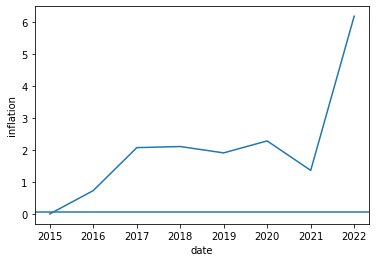

In [17]:
sns.lineplot(data=inflation_year, x='date', y='inflation')
plt.axhline(y=inflation_rate)

- Từ năm 2018 - 2021, tỉ lệ lạm phát có xu hướng tăng ko mạnh. Vào những năm này, đường chạy giá ko có xu hướng tăng mạnh, thể hiện ở cả stock market lẫn Bitcoin. Tuy nhiên, vào năm 2021-2022, cả 3 tăng cực mạnh

In [18]:
slope_rp

,Inflation vs S&P500,Inflation vs Bitcoin,Inflation vs Gold
Slope,4.149077,12.416423,-1.108720
R-squared,0.591565,0.046890,-0.155191


- Bitcoin has an outstanding correlation performance in terms of slope (the higher the inflation goes, the higher the bitcoin flys). However, that is not always the case as R-squared was very very little (meaning more data is scattered - not follow this trend) - another implification for risk indicator

#### 5.2 Return price vs inflation percentile

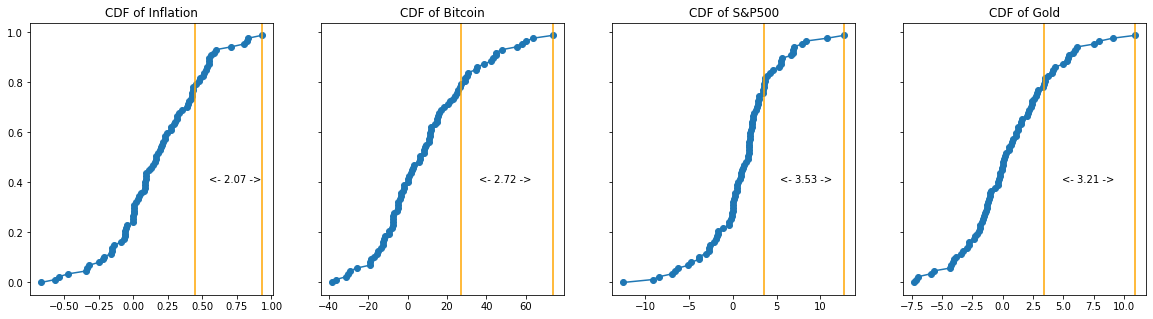

In [19]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

draw_ecdf(ax1, inflation_month.inflation, 'Inflation')
draw_ecdf(ax2, inflation_month.btc_pct, 'Bitcoin')
draw_ecdf(ax3, inflation_month.sp_pct, 'S&P500')
draw_ecdf(ax4, inflation_month.gold_pct, 'Gold')

- Từ ECDF, ta có thể dễ dàng nhìn thấy mức độ tăng trưởng của inflation và các loại tài sản. Có thể thấy, tại < 80% của inflation và bitcoin suggested that tại normal case, mức độ tăng trưởng của các data này vô cùng nhỏ. Tại extreme case (> 80% ), as inflation có sự gia tăng khủng khiếp (từ 0.4 lên 1 - khoảng 2.5 lần), Bitcoin tăng trưởng 2.7 lần 

Triangle is Mean, Line is Median 



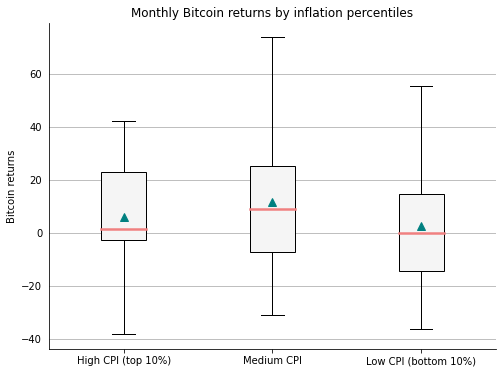

In [20]:
fig, ax = draw_compare_boxplot([extreme_btc, middle_btc, lowest_btc], ['High CPI (top 10%)','Medium CPI','Low CPI (bottom 10%)'])
plt.title('Monthly Bitcoin returns by inflation percentiles')
ax.set_ylabel('Bitcoin returns')
print('Triangle is Mean, Line is Median \n')
plt.show()

Triangle is Mean, Line is Median 



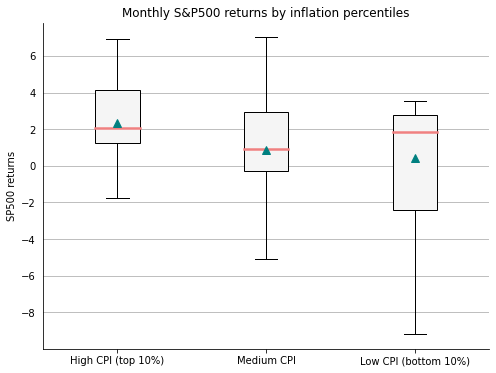

In [21]:
fig, ax = draw_compare_boxplot([extreme_sp, middle_sp, lowest_sp], ['High CPI (top 10%)','Medium CPI','Low CPI (bottom 10%)'])
plt.title('Monthly S&P500 returns by inflation percentiles')
ax.set_ylabel('SP500 returns')
print('Triangle is Mean, Line is Median \n')
plt.show()

Triangle is Mean, Line is Median 



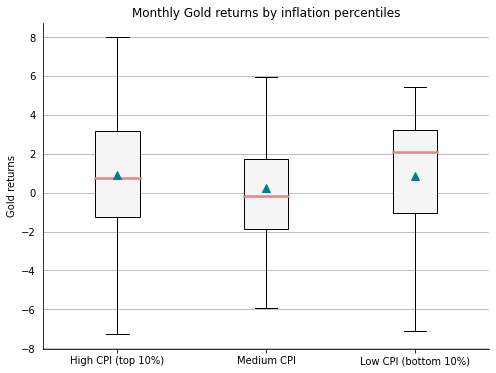

In [22]:
fig, ax = draw_compare_boxplot([extreme_gold, middle_gold, lowest_gold], ['High CPI (top 10%)','Medium CPI','Low CPI (bottom 10%)'])
plt.title('Monthly Gold returns by inflation percentiles')
ax.set_ylabel('Gold returns')
print('Triangle is Mean, Line is Median \n')
plt.show()

- Switching to monthly yield, 75% percent of the time we would expect a approximately 20% gain from bitcoin regardless CPI index. This reflects poorly in SP500 and gold. S&P500 would be considerably good when inflation rate high, conversely from gold perform exceptionally steady at low CPI. 
- However, the lowest negative returns occurs when the CPI is at its highest, however not too differ from mid and low CPI, meaning that the riskiness of the asset does not change base on CPI (*SP500 are definitely the best option for hedging against inflation, because its tail decreases as the inflation goes up !!!*) 

>💡 **Finding 5**<br> 
Bitcoin is an independent asset comparing to inflation, so it is a good hedge against inflation or not is related to the risk-willingness the coporate would spend (best for ***high risk - high reward*** strategy)

### 📈 6. Portfolio Optimization (low-risk favour)

- Assume that the company 100% investment is about the three assets. Portfolio is weighted by [percent BTC, percent SP500, percent gold]

#### 6.1 Example of Bitcoin portfolio

With portfolio pct_change, we can easily calculate: Volatility, Sharpe ratio, Sortino Ratio, VaR & CVaR

In [23]:
display(tt.create_volatility_rp('Bitcoin', 'SP500'), 
      tt.create_ratio_rp(sharpe_ratio, 'bitcoin', 'sp500', 'Sharpe'),
      tt.create_ratio_rp(sortino_ratio, 'bitcoin', 'sp500', 'Sortino'),
      tt.create_var_rp(value_at_risk_single, 90, 'bitcoin', 'sp500', 'VaR'),
      tt.create_var_rp(expected_shortfall, 90, 'bitcoin', 'sp500', 'CVaR'),
      )

,20% Bitcoin,40% Bitcoin,60% Bitcoin,80% Bitcoin
20% SP500,0.053881,0.097706,0.144056,0.191102
40% SP500,0.055376,0.100339,0.147077,nan
60% SP500,0.059181,0.104221,nan,nan
80% SP500,0.064891,nan,nan,nan


,20% bitcoin,40% bitcoin,60% bitcoin,80% bitcoin
20% sp500,0.411798,0.391230,0.376680,0.367868
40% sp500,0.421765,0.392600,0.376880,nan
60% sp500,0.414377,0.389180,nan,nan
80% sp500,0.395907,nan,nan,nan


,20% bitcoin,40% bitcoin,60% bitcoin,80% bitcoin
20% sp500,1.096583,0.954729,0.900577,0.854240
40% sp500,1.024867,0.968305,0.859560,nan
60% sp500,0.877333,0.881725,nan,nan
80% sp500,0.730776,nan,nan,nan


,20% bitcoin,40% bitcoin,60% bitcoin,80% bitcoin
20% sp500,-0.043533,-0.067770,-0.102013,-0.139887
40% sp500,-0.043704,-0.066070,-0.102028,nan
60% sp500,-0.049801,-0.078533,nan,nan
80% sp500,-0.060850,nan,nan,nan


,20% bitcoin,40% bitcoin,60% bitcoin,80% bitcoin
20% sp500,-0.052896,-0.107739,-0.164794,-0.223165
40% sp500,-0.059158,-0.113211,-0.171023,nan
60% sp500,-0.071098,-0.122467,nan,nan
80% sp500,-0.086406,nan,nan,nan


- Beside Sharpe ratio, most metrics suggests a 20-20-60 investment in Bitcoin, Stock and Gold for maximum security

#### 6.2 Efficient frontier simulation

In [24]:
efficient = SimulateEfficientFrontier(portfolio_data, 1000)()

In [25]:
DE = DrawEfficientFrontier(efficient, 'volatility', 'mean', 'sortino ratio', 'index_col')
DE('Annualised Risk (Volatility)', 'Annualised Return').show()

In [1]:
best_ratio = DE.get_max_sortino()['weight seed'].values[0]
print(f'Best ratio is Bitcoin: {best_ratio[0]*100:.1f}%, Stock market: {best_ratio[1]*100:.1f}%, Gold: {best_ratio[2]*100:.1f}%')

NameError: name 'DE' is not defined

>💡 **Finding 6**<br> 
Best ratio is Bitcoin: 15.3%, Stock market: 20.6%, Gold: 64.1%

### 📈 7. Summary

1. How does the performance of Bitcoin compare to the S&P 500 and the price of gold?

> 💡 **Finding 1**<br>
In average, Bitcoin surpass the price of SP500 by 295.04% and Gold by 605.84%. Có thể thấy rằng khoảng thời điểm từ năm 2019 đến 2021 có rất nhiều sự biến động dẫn tới sự gia tăng đột biên này

>💡 **Finding 3**<br> 
Return of Bitcoin follow the same trend as S&P500, but at much much more performant (illustrated in price chart, kurtosis parameter) and higher risk (illustrated in higher volatility, VaR, CVaR & MDD)

2. Analyze Bitcoin's returns and volatility profile. Do you believe it could help improve the performance of a portfolio? Do you believe Bitcoin could be used as a hedge versus inflation?

>💡 **Finding 2**<br> 
Mặc dù sự quan tâm của nhà đầu tư có xu hướng tăng đáng kể qua từng năm, mức độ ổn định về giá so với độ quan tâm của loại tài sản Bitcoin có xu hướng ko ổn định, nhiều sự xuống giá đột ngột -> risky cho short-term investment so với S&P500 có tỉ số price/volume vô cùng ổn định và dễ đoán

>💡 **Finding 4**<br> 
Bitcoin outperform S&P500 and Gold in every Risk-Return categories

>💡 **Finding 5**<br> 
Bitcoin is an independent asset comparing to inflation, so it is a good hedge against inflation or not is related to the risk-willingness the coporate would spend (best for ***high risk - high reward*** strategy)


3. The CFO is looking to lower volatility in the fund. Explore building a portfolio using some or all of these assets. Make a recommendation that minimizes overall risk.
>💡 **Finding 6**<br> 
Best ratio is Bitcoin: 15.3%, Stock market: 20.6%, Gold: 64.1%